In [3]:
#importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('E:\Python\EDA\AB_NYC_2019.csv')

In [6]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [8]:
df.shape

(48895, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [10]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.rename(columns={'neighbourhood_group':'neighbourhood','neighbourhood':'sub-neighbourhood','calculated_host_listings_count':'listing_per_host','availability_365':'availability_days'},inplace=True)

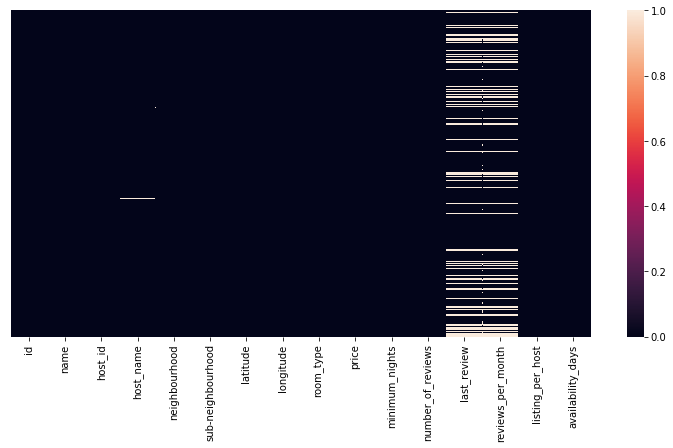

In [13]:
plt.figure(figsize=(13,6))
ax = sns.heatmap(df.isnull(),yticklabels=False)
plt.show()

In [14]:
df1 = df.drop(['id','name','host_name','last_review','reviews_per_month'],axis=1)
df1.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,listing_per_host,availability_days
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [15]:
df1['room_type'].value_counts()


Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

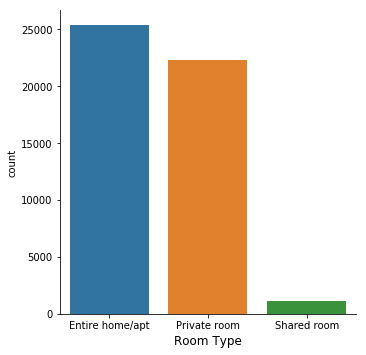

In [16]:
plt1 = sns.catplot(data=df1,x='room_type',kind='count',order = df1['room_type'].value_counts().index)
plt1.set_xlabels('Room Type',fontsize=12)

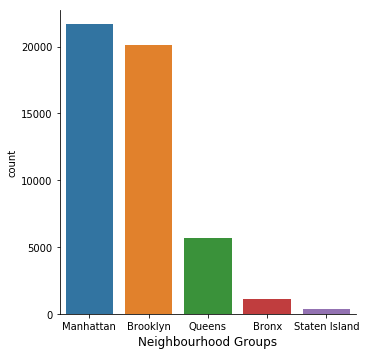

In [17]:
plt2 = sns.catplot(x="neighbourhood",kind='count',data=df1, order = df1['neighbourhood'].value_counts().index)
plt2.set_xlabels('Neighbourhood Groups',fontsize=12)

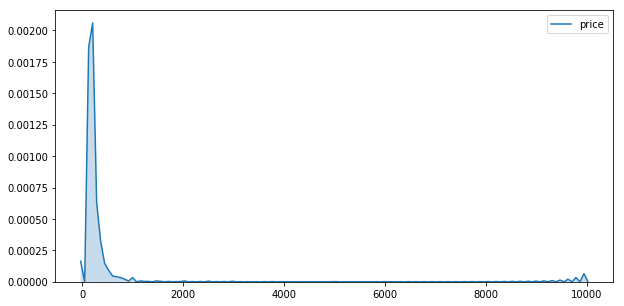

In [50]:
plt.figure(figsize=(10,5))

sns.kdeplot(df1['price'], shade=True)

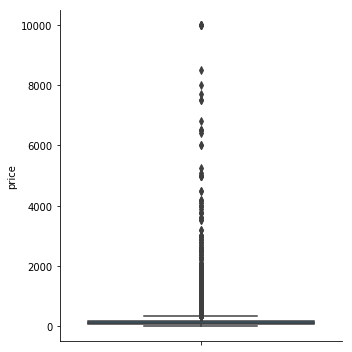

In [247]:
sns.catplot(y='price',data=df1, kind='box')

In [51]:
#Having a look at the 95 quantile range for Price data
df1.quantile(0.95)['price']


355.0

<Figure size 720x720 with 0 Axes>

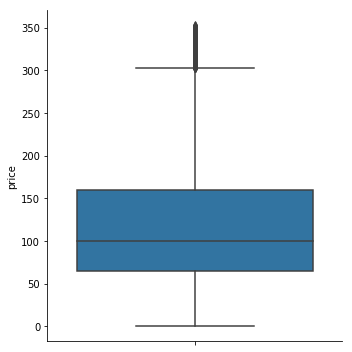

In [52]:
df1 = df1[df1['price']< df1.quantile(0.95)['price']]
plt.figure(figsize =(10,10))
sns.catplot(y='price',data=df1, kind='box')

Text(0.5, 1.0, 'Price Distribution')

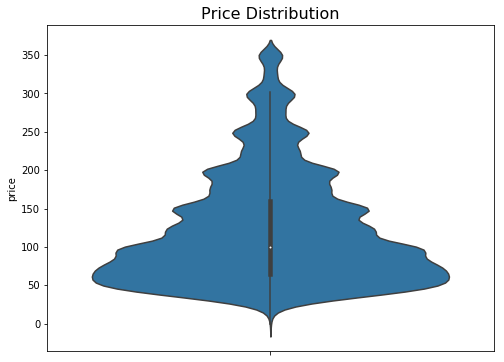

In [68]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(y=df1['price'])
ax.set_title('Price Distribution',fontsize=16)


Text(0.5, 1.0, 'Prices as per Neighbourhood')

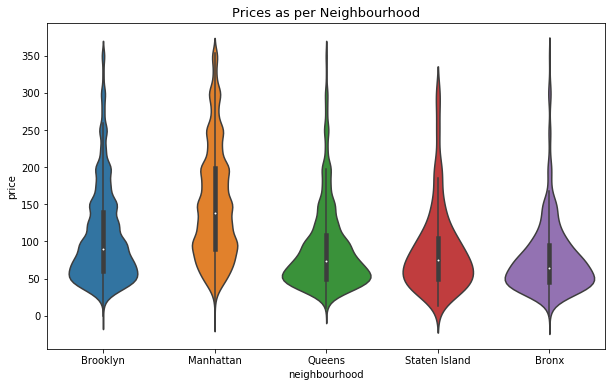

In [79]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(x=df1['neighbourhood'],y=df1['price'])
ax.set_title('Prices as per Neighbourhood',fontsize=13)

Text(0.5, 1.0, 'Price Distribution as per Room Type')

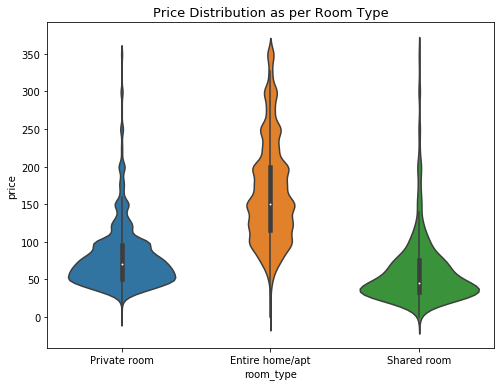

In [72]:
plt.figure(figsize=(8,6))
ax = sns.violinplot(x=df1['room_type'],y=df1['price'])
ax.set_title('Price Distribution as per Room Type',fontsize=13)

In [211]:
df1['room_type'].value_counts()

Entire home/apt    23259
Private room       22043
Shared room         1142
Name: room_type, dtype: int64

home/apt type has more uniform distribution with high median
shared room has lowest median
Shared rooms are not very common 

In [224]:
#Average price for each neighbourhood
df1[['neighbourhood','room_type','price']].groupby(['neighbourhood','room_type']).mean()

price
neighbourhood room_type                  
Bronx         Entire home/apt  114.144809
              Private room      60.595679
              Shared room       47.254237
Brooklyn      Entire home/apt  151.210729
              Private room      70.532023
              Shared room       48.036496
Manhattan     Entire home/apt  186.220413
              Private room      99.153836
              Shared room       78.249467
Queens        Entire home/apt  132.933235
              Private room      66.067660
              Shared room       46.989691
Staten Island Entire home/apt  121.089286
              Private room      62.292553
              Shared room       57.444444

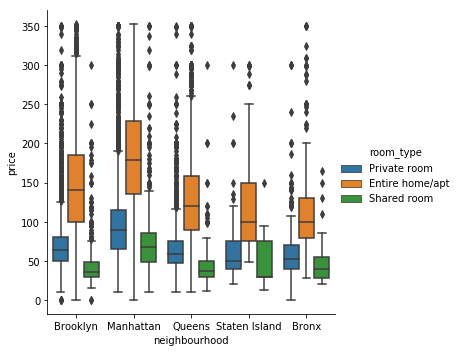

In [235]:
ax=sns.catplot("neighbourhood", "price", "room_type", data=df1, kind="box")

home/apt has highest avg price in all neighbourhood
Manhattan has the highest median for prices followed by brooklyn
shared room has the lowest


In [64]:
#sns.kdeplot(df1['price'], shade=True)

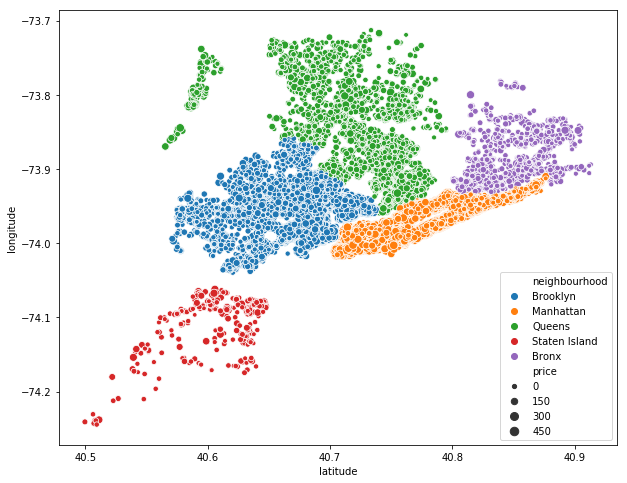

In [287]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df1,x='latitude',y='longitude',size='price',hue='neighbourhood')


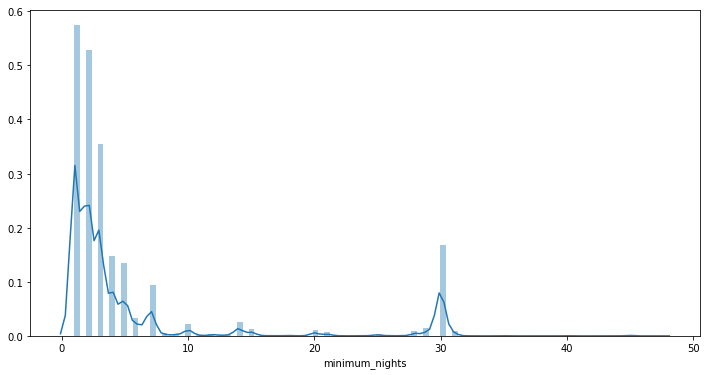

In [92]:
plt.figure(figsize=(12,6))
sns.distplot(df1[df1['minimum_nights']<50]['minimum_nights'],bins=100)

In [99]:
len(df1[df1['minimum_nights']>50])

416

Minimum nights for booking is about 1 day and we also have another peak for 30 days ,some properties requires bookings for atleast a month 

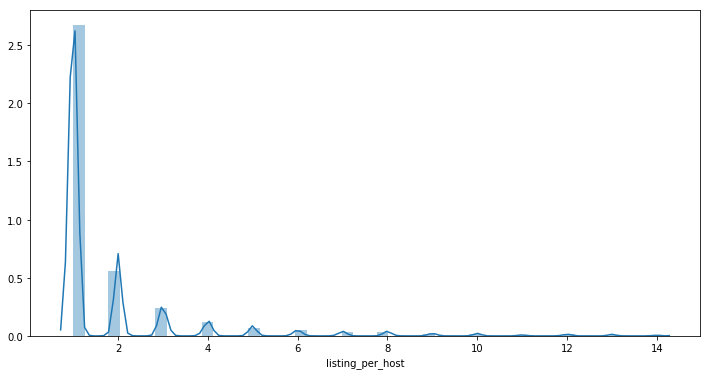

In [115]:
plt.figure(figsize=(12,6))
sns.distplot(df1[df1['listing_per_host']<15]['listing_per_host'])

In [125]:
len(df1[df1['listing_per_host']<7]['listing_per_host'])

42562

Maximum bookings are  done for less than a week. mostly for a day or two.

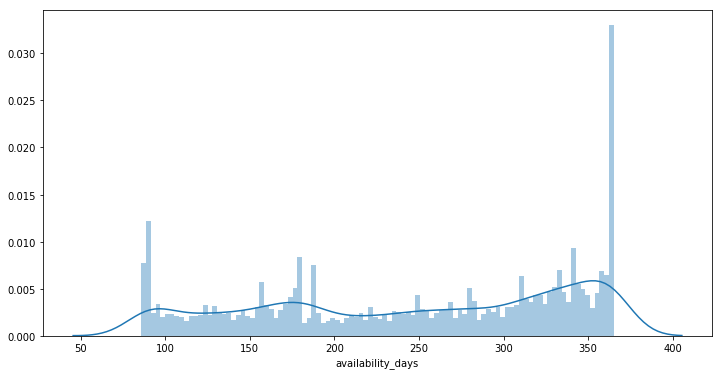

In [177]:
plt.figure(figsize=(12,6))
sns.distplot(df1[df1['availability_days']>85]['availability_days'],bins=100)

In [178]:
print("The availability of days for 0 days is: ",len(df1[df1['availability_days']==0]))
print("The availability of days for 365 days is: ",len(df1[df1['availability_days']==365]))

The availability of days for 0 days is:  17009
The availability of days for 365 days is:  1122


In [210]:
df1[df1['availability_days']==365]['room_type'].value_counts()

Private room       631
Entire home/apt    363
Shared room        128
Name: room_type, dtype: int64

We can see major peaks at 0 and 365 days

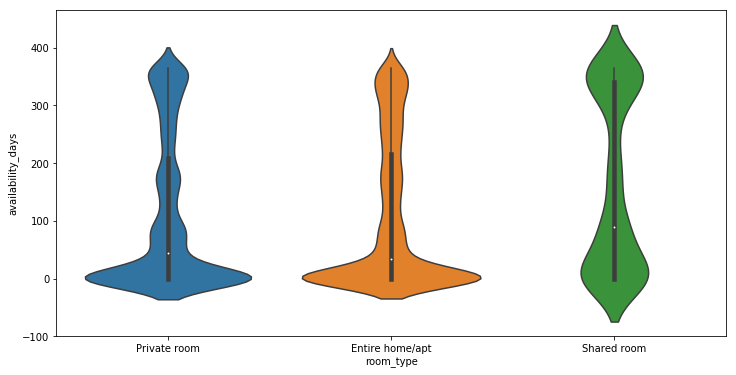

In [180]:
plt.figure(figsize=(12,6))
sns.violinplot(y=df1['availability_days'],x=df1['room_type'])

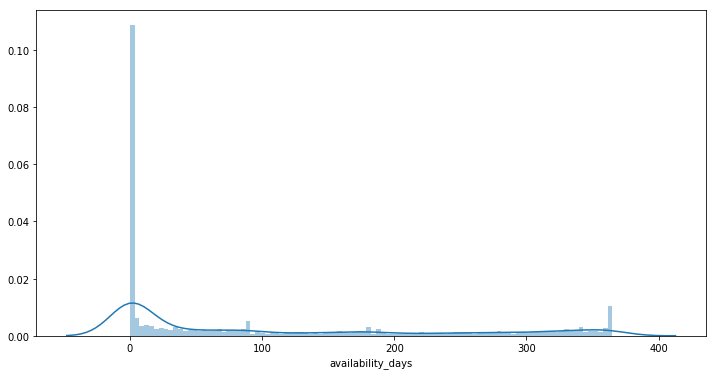

In [183]:
plt.figure(figsize=(12,6))
sns.distplot(df1[df1['listing_per_host']<50]['availability_days'],bins=100)

In [205]:
len(df1[df1['listing_per_host']==1]) 

30681

Most of the customers have listing only once. Categories can be 1 and 1+

In [255]:
df1.head()

,host_id,host_name,neighbourhood,sub-neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,listing_per_host,availability_days
0,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
#df2 = df1[['host_id','price','neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]

In [ ]:
#df2.rename(columns={'neighbourhood_group':'neighbourhood','neighbourhood':'sub-neighbourhood','calculated_host_listings_count':'listing_per_host','availability_365':'availability_days'},inplace=True)
#df2.head()

In [274]:
#df1['host_id'] = df1['host_id'].apply(lambda x:str(x))


In [294]:
#df2.info()

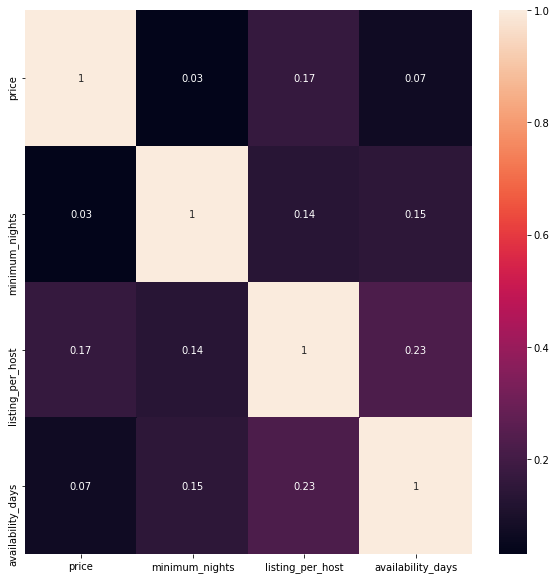

In [286]:
plt.figure(figsize =(10,10))

sns.heatmap(df1[['price','minimum_nights','listing_per_host','availability_days']].corr(), annot=True)
